In [104]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import xlrd
import geopandas as gpd

In [398]:
RESOURCE_MAX = .25
INDICATORS = {
    'overall':{
        'crit':{
            'antimony':  {'vmax':RESOURCE_MAX},
            'beryllium': {'vmax':RESOURCE_MAX},
            'bismuth':   {'vmax':RESOURCE_MAX},
            'cadmium':   {'vmax':RESOURCE_MAX},
            'chromium':  {'vmax':RESOURCE_MAX},
            'cobalt':    {'vmax':RESOURCE_MAX},
            'graphite':  {'vmax':RESOURCE_MAX},
            'lithium':   {'vmax':RESOURCE_MAX},
            'magnesium': {'vmax':RESOURCE_MAX},
            'manganese': {'vmax':RESOURCE_MAX},
            'molybdenum':{'vmax':RESOURCE_MAX},
            'niobium':   {'vmax':RESOURCE_MAX},
            'palladium': {'vmax':RESOURCE_MAX},
            'platinum':  {'vmax':RESOURCE_MAX},
            'ree':       {'vmax':RESOURCE_MAX},
            'rhodium':   {'vmax':RESOURCE_MAX},
            'titanium':  {'vmax':RESOURCE_MAX},
            'tungsten':  {'vmax':RESOURCE_MAX},
            'uranium':   {'vmax':RESOURCE_MAX},
            'zirconium': {'vmax':RESOURCE_MAX},
        },
        'metals':{
            'aluminum':  {'vmax':RESOURCE_MAX},
            'copper':    {'vmax':RESOURCE_MAX},
            'gold':      {'vmax':RESOURCE_MAX},
            'silver':    {'vmax':RESOURCE_MAX},
            'nickel':    {'vmax':RESOURCE_MAX},
            'zinc':      {'vmax':RESOURCE_MAX},
            'lead':      {'vmax':RESOURCE_MAX},
            'steel':     {'vmax':RESOURCE_MAX},
            'tin':       {'vmax':RESOURCE_MAX},
        },
        'ag':{
            'coffee':    {'vmax':RESOURCE_MAX},
            'maize':     {'vmax':RESOURCE_MAX},
            'milk':      {'vmax':RESOURCE_MAX},
            'palm':      {'vmax':RESOURCE_MAX},
            'pork':      {'vmax':RESOURCE_MAX},
            'poultry':   {'vmax':RESOURCE_MAX},
            'rice':      {'vmax':RESOURCE_MAX},
            'soy':       {'vmax':RESOURCE_MAX},
            'sugar':     {'vmax':RESOURCE_MAX},
            'wheat':     {'vmax':RESOURCE_MAX},
            'beef':      {'vmax':RESOURCE_MAX},
        },
        'energy':{
            'gas':       {'vmax':RESOURCE_MAX},
            'oil':       {'vmax':RESOURCE_MAX},
            'coal':      {'vmax':RESOURCE_MAX},
        },
        'mil_ex': {'log':True, 'winsor':2.5},
        'arms': {
             'arms_ex': {'vmax':.5},
             'arms_im': {'vmax':.2},
        },
        'unga': {},
        'aid': {'vmax':.10},
        'trade':{'log':True, 'winsor':2.5},
        'fdi':{'log':True, 'winsor':2.5},
        'students':{
            'student_in':{'log':True, 'winsor':2.5},
            'student_out':{'log':True, 'winsor':2.5},
        }
    },
    'resources':{
        'crit',
        'metals',
        'ag',
        'energy',
    },
    'mil':{
        'arms',
        'mil_ex',
    },
    'diplo':{
        'unga',
        'aid',
    },
    'soft':{
        'trade',
        'fdi',
        'students'
    }
}
def iterind(f, indicators=None, **kwargs):
    if indicators is None:
        indicators = INDICATORS
    for k,v in indicators.items():
        if (type(v) is dict and len(v) and not ('vmin' in v or 'vmax' in v or 'log' in v)):
            iterind(f, v, **kwargs)
        f(k, v, **kwargs)

In [399]:
countries = pd.read_csv('countries.csv')
countries = countries.set_index('iso_a3').drop('-99')
#shps = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
shps = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip')
shps.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [406]:
dat = pd.read_csv('all_ind2.csv')
dat.set_index('iso', inplace=True)
dat['fdi_us'].loc[dat['fdi_us']==0] = np.nan
dat['fdi_cn'].loc[dat['fdi_cn']==0] = np.nan
dat['country'] = countries['name']
dat = dat[countries['primary']>0]
dat.head()


/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,country,aluminum_us,aluminum_cn,antimony_us,antimony_cn,beryllium_us,beryllium_cn,bismuth_us,bismuth_cn,cadmium_us,...,aid_us,aid_cn,unga_us,unga_cn,arms_ex_us,arms_im_us,arms_ex_cn,arms_im_cn,mil_ex_us,mil_ex_cn
iso,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.064,0.001,0.23,0.82,0.47,0.0,0.00,0.0,0,0
ALB,Albania,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005,0.000,0.48,0.50,0.00,0.0,0.00,0.0,10,0
DZA,Algeria,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.17,0.81,0.01,0.0,0.18,0.0,4,0
AGO,Angola,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001,0.012,0.16,0.81,0.00,0.0,0.07,0.0,3,2
ARG,Argentina,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.002,0.30,0.76,0.60,0.0,0.00,0.0,3,0


In [407]:
def norm(seq, vmin=None, vmax=None, log=False, winsor=False):
    if log:
        seq = seq+1
    if not vmin:
        if winsor:
            vmin = np.nanpercentile(seq, winsor)
        else:
            vmin = np.min(seq)
    if not vmax:
        if winsor:
            vmax = np.nanpercentile(seq, 100-winsor)
        else:
            vmax = np.max(seq)
    if log:
        seq = np.log(seq)
        vmin = np.log(vmin)
        vmax = np.log(vmax)
    s = (seq - vmin)/(vmax - vmin)
    s = np.clip(s, 0, 1)
    return s

In [417]:
out = pd.DataFrame(index=dat.index)
out['country'] = dat['country']

def agg(ind, args, df=out, max_resources=False):
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if args == {} or 'vmin' in args or 'vmax' in args or 'log' in args:
        if usi in dat:
            df[usi] = norm(dat[usi], **args)
            df.at['USA', usi] = np.nan
            if df[usi].min() == df[usi].max():
                df[usi] = np.nan
            df[cni] = norm(dat[cni], **args)
            df.at['CHN', cni] = np.nan
            if df[cni].min() == df[cni].max():
                df[cni] = np.nan
    else:
        usargs = ['{}_us'.format(arg) for arg in args]
        cnargs = ['{}_cn'.format(arg) for arg in args]
        if max_resources and ind in ['crit', 'metals', 'ag', 'energy']:
            df[usi] = np.nanmax(df[usargs], axis=1)
            df[cni] = np.nanmax(df[cnargs], axis=1)
        else:
            df[usi] = np.nanmean(df[usargs], axis=1)
            df[cni] = np.nanmean(df[cnargs], axis=1)

out2 = out.copy()
iterind(agg, df=out2)
iterind(agg, df=out, max_resources=True)

out.head()

/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN axis encountered
/usr/local/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN axis encountered


,country,antimony_us,antimony_cn,beryllium_us,beryllium_cn,bismuth_us,bismuth_cn,cadmium_us,cadmium_cn,chromium_us,...,overall_us,overall_cn,resources_us,resources_cn,mil_us,mil_cn,diplo_us,diplo_cn,soft_us,soft_cn
iso,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.242547,0.120103,0.000,0.000,0.235000,0.000000,0.581522,0.395244,0.396211,0.176883
ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,...,0.172765,0.095452,0.003,0.038,0.307988,0.000000,0.247094,0.195122,0.302743,0.206140
DZA,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.140727,0.216120,0.002,0.001,0.211718,0.090000,0.053864,0.384146,0.434052,0.475009
AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.148992,0.305394,0.009,0.078,0.178057,0.237842,0.053379,0.444146,0.495524,0.561120
ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.379539,0.284154,0.274,0.160,0.428057,0.000000,0.124516,0.363659,0.657928,0.586125


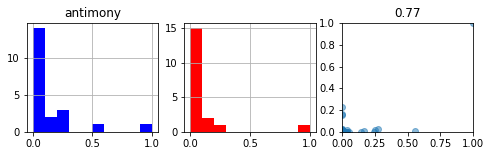

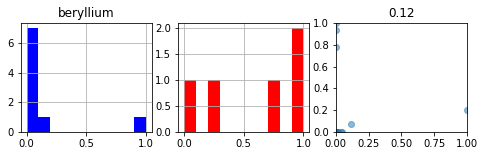

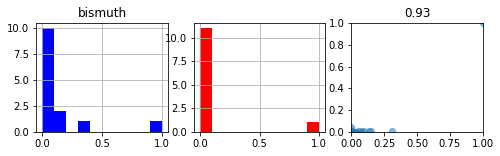

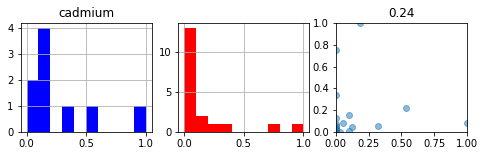

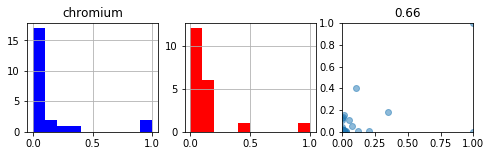

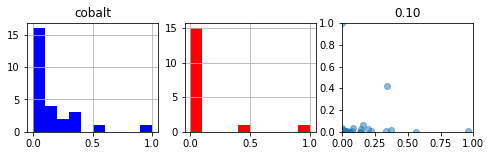

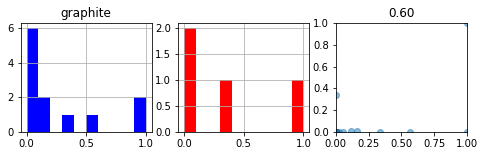

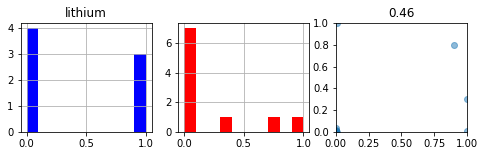

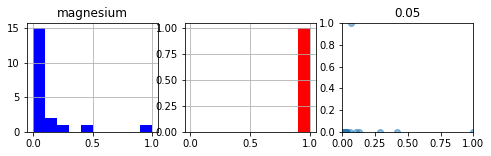

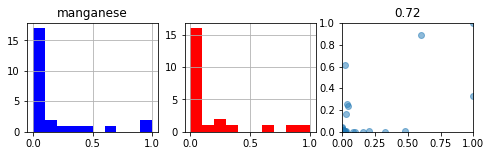

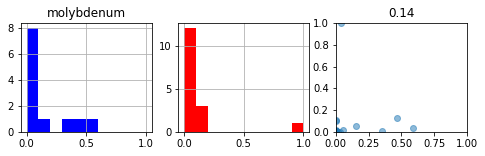

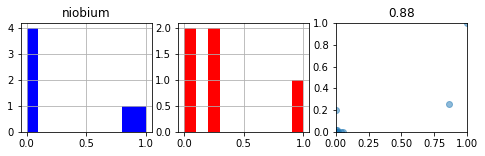

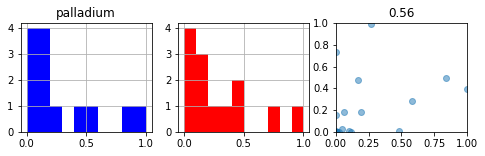

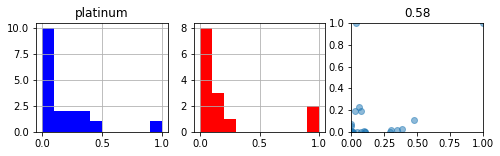

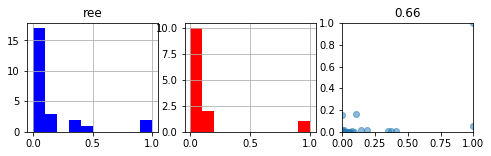

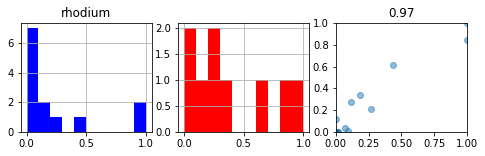

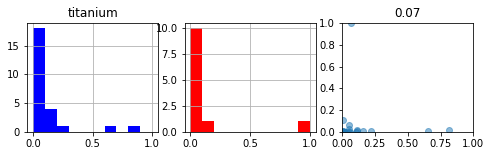

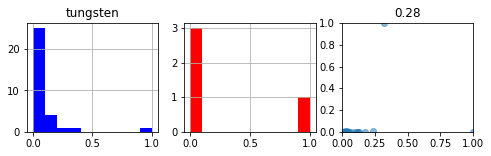

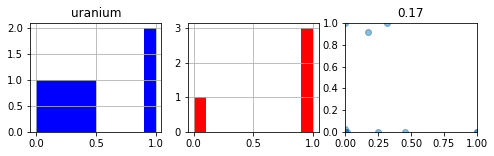

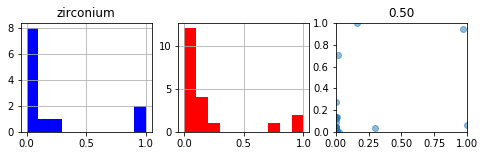

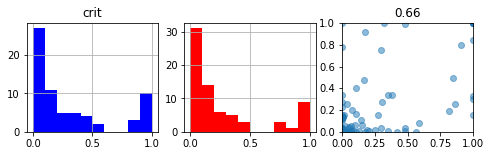

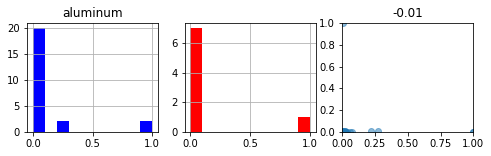

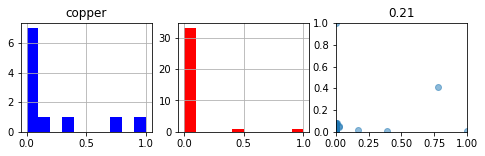

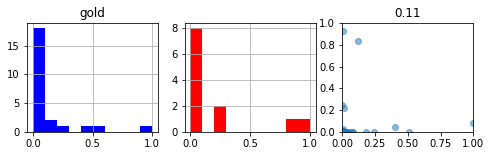

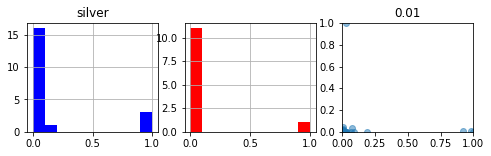

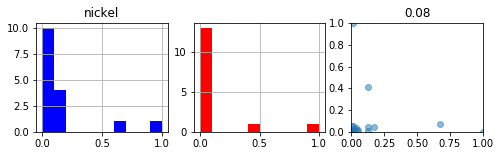

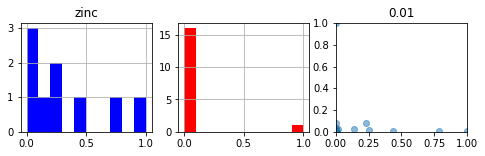

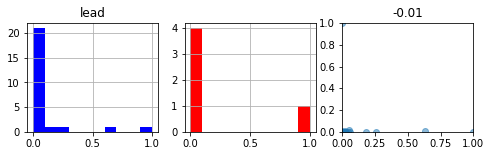

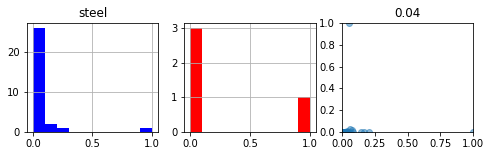

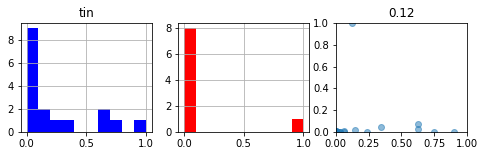

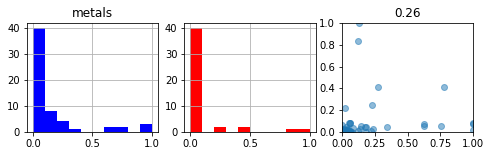

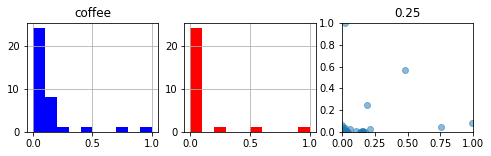

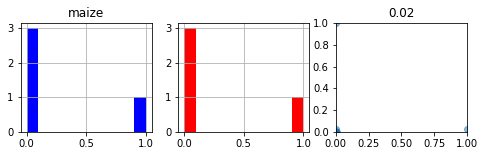

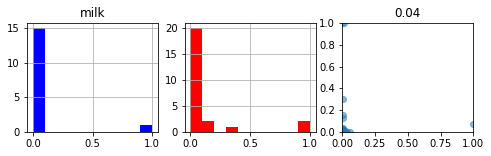

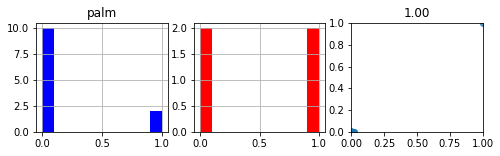

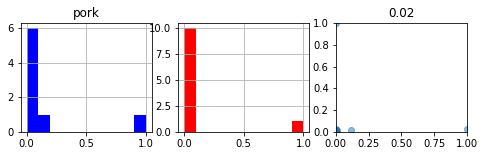

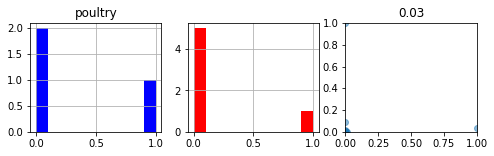

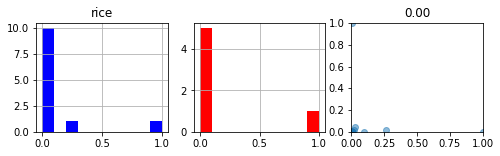

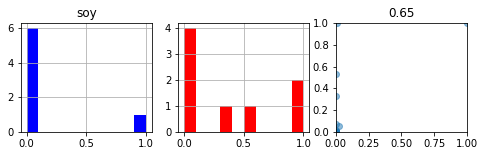

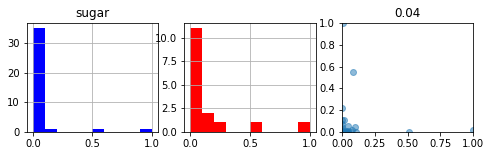

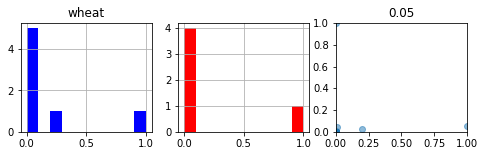

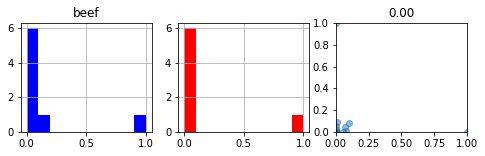

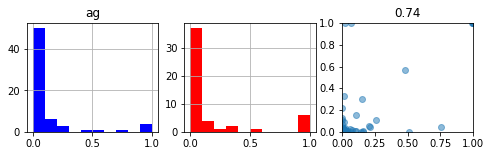

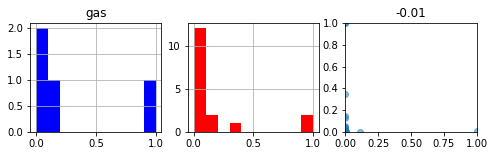

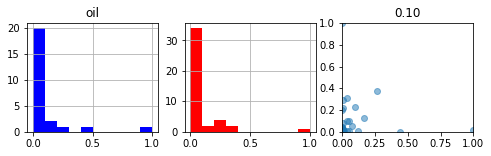

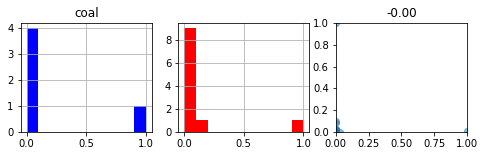

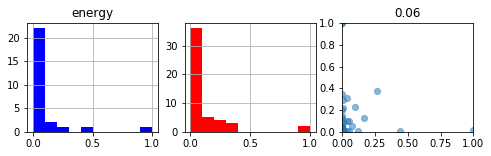

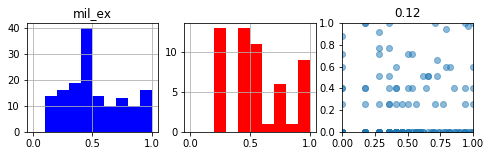

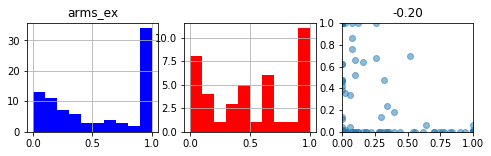

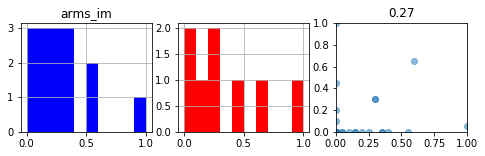

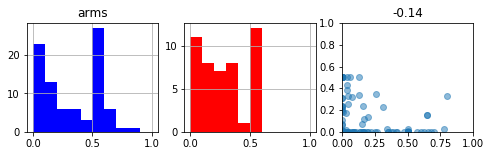

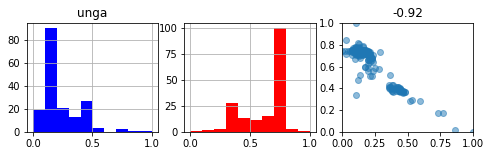

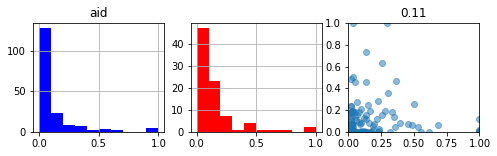

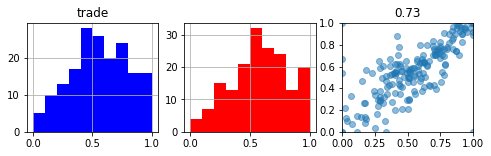

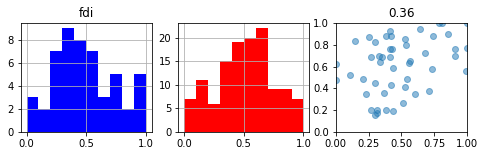

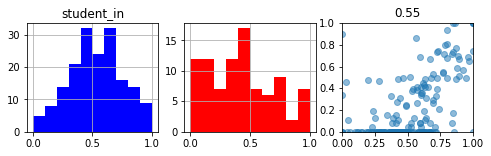

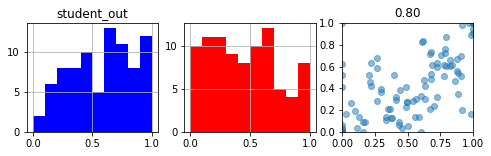

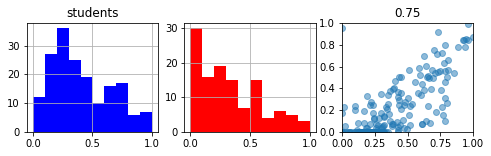

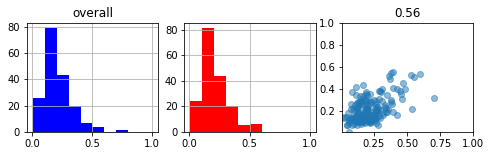

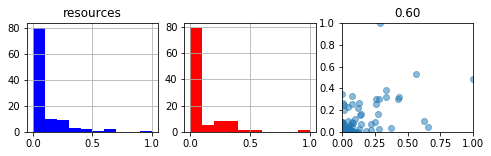

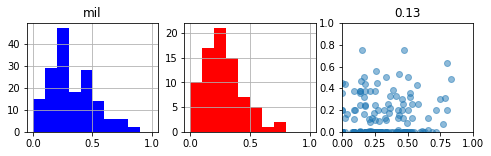

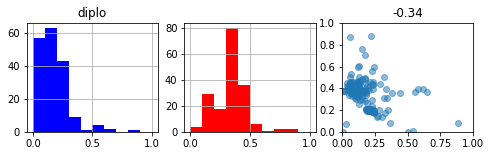

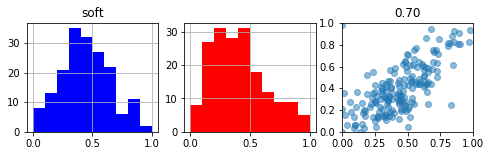

In [409]:
def plots(ind, *args, dat=dat, vmax=None, skipzeros=False):
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if usi in dat:
        x = dat[usi].copy()
        y = dat[cni].copy()
        both = np.vstack((x,y))
        vmin = np.nanmin(both)
        if not vmax:
            vmax = np.nanmax(both)
        if skipzeros:
            x.loc[x==0] = np.nan
            y.loc[y==0] = np.nan
        fig, axs = plt.subplots(1, 3, figsize=(8, 2))
        x.hist(ax=axs[0], color='b', range=(vmin, vmax))
        y.hist(ax=axs[1], color='r', range=(vmin, vmax))
        axs[2].scatter(dat[usi], dat[cni], alpha=.5)
        axs[2].set_xlim((vmin, vmax))
        axs[2].set_ylim((vmin, vmax))
        axs[0].set_title(ind)
        axs[2].set_title("{:0.2f}".format(dat[[usi,cni]].corr().iloc[1,0]))
        fig.show()
iterind(plots, dat=out, vmax=1, skipzeros=True)

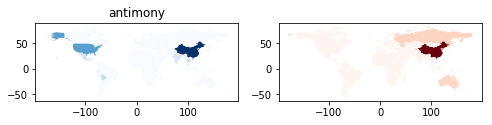

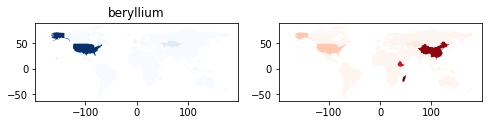

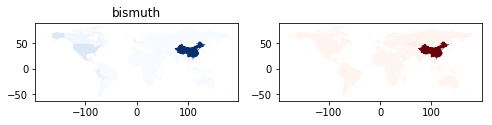

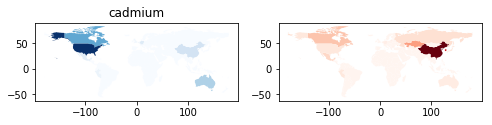

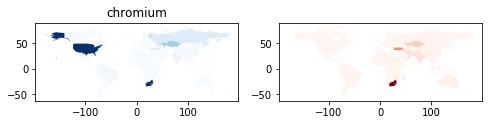

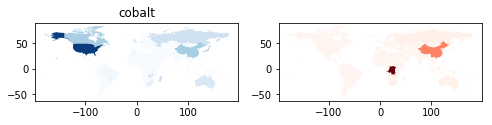

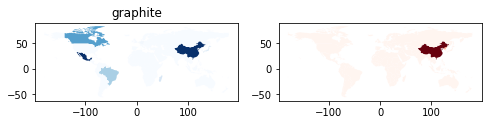

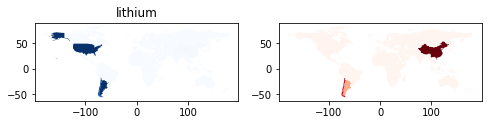

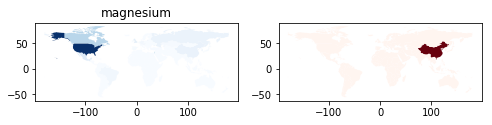

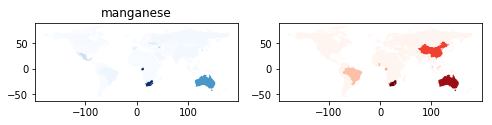

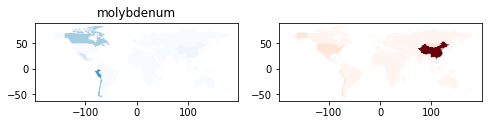

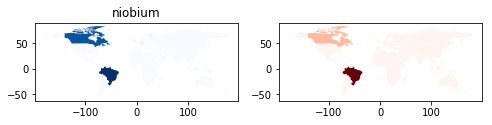

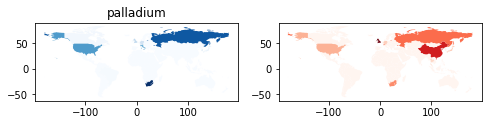

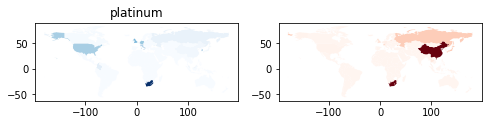

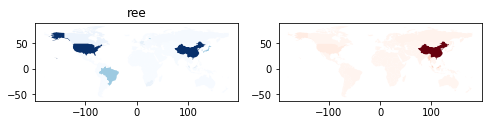

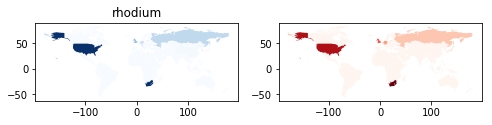

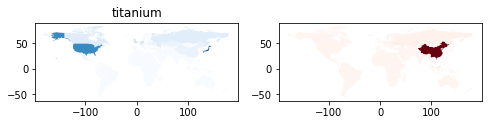

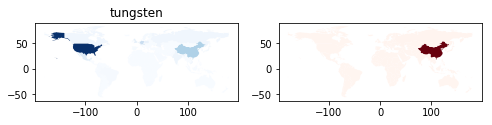

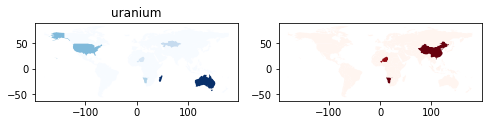

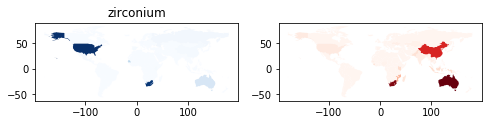

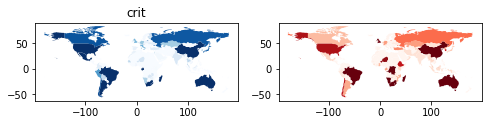

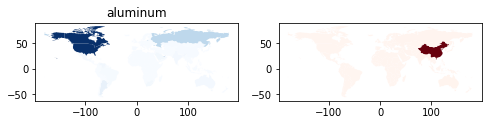

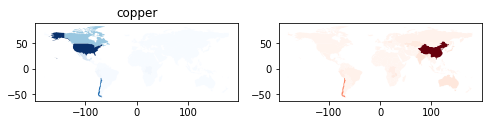

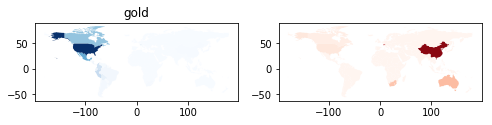

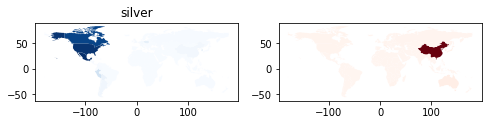

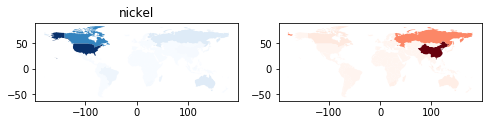

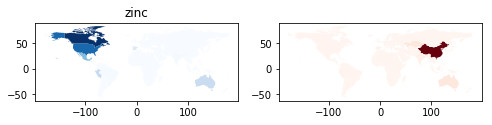

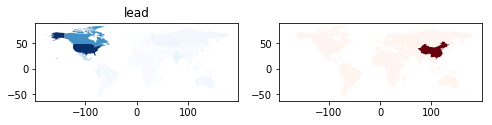

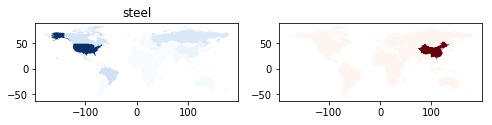

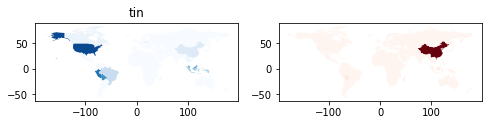

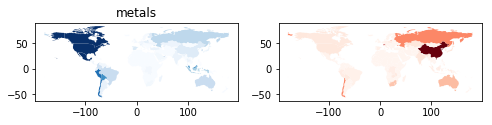

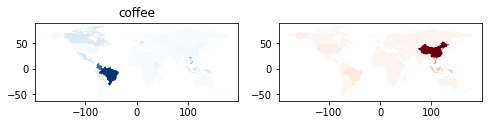

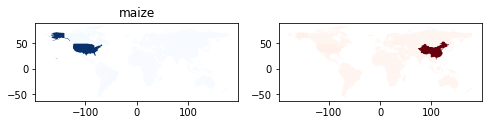

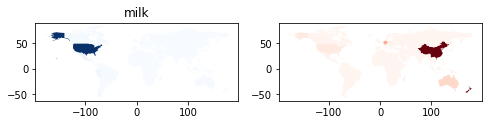

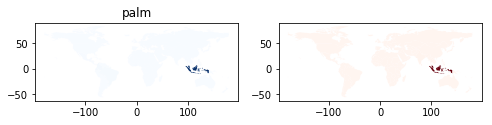

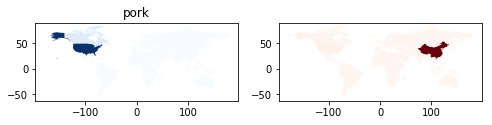

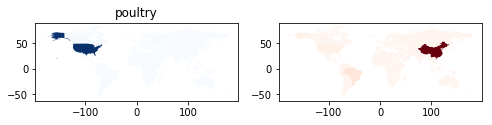

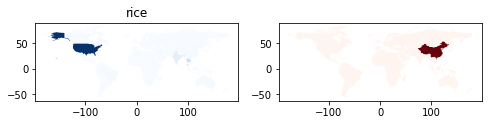

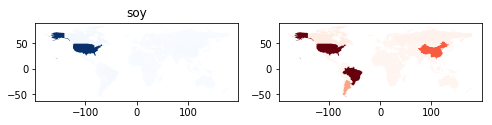

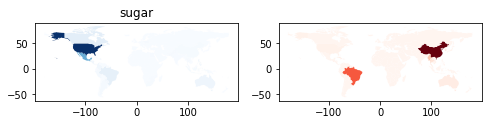

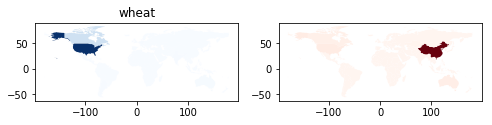

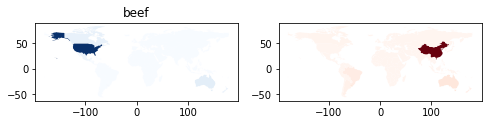

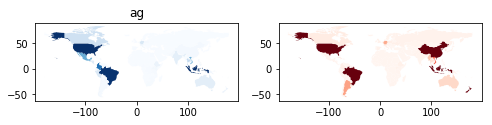

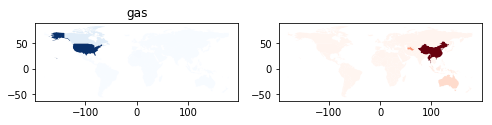

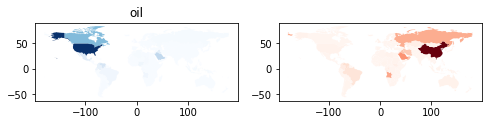

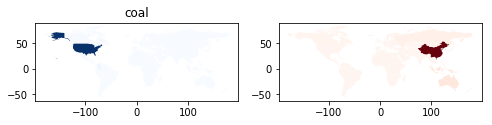

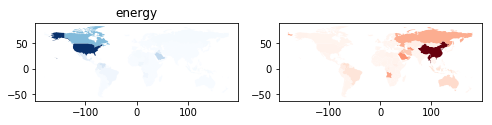

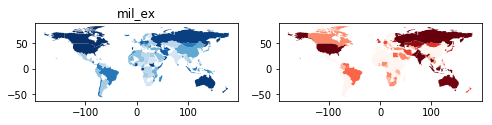

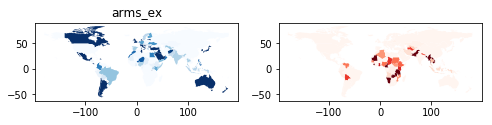

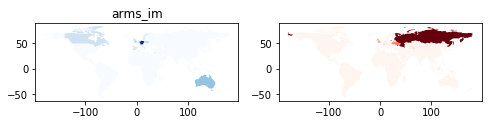

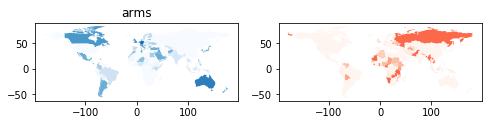

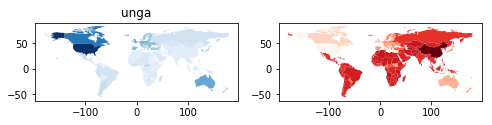

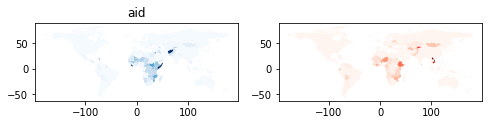

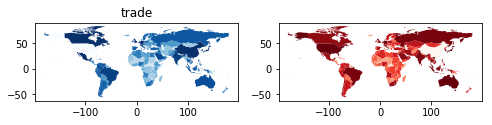

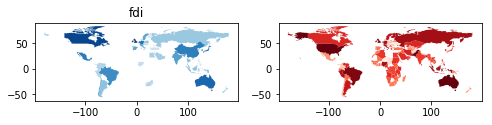

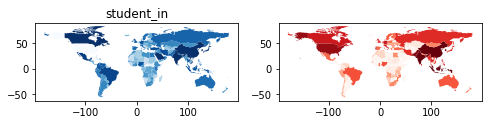

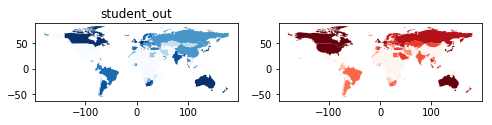

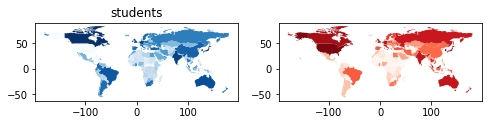

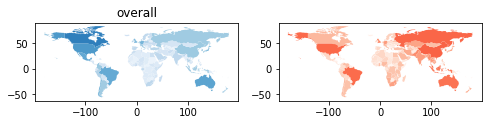

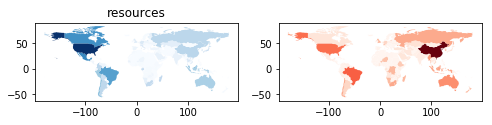

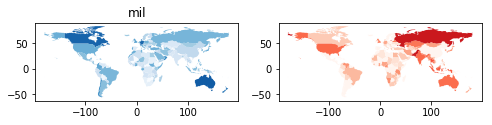

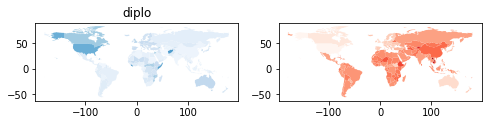

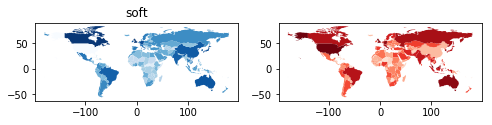

In [410]:
def maps(ind, *args, dat=dat, vmax=None):
    shp2 = shps.set_index('ISO_A3').join(dat)
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if usi in dat:
        fig, axs = plt.subplots(1, 2, figsize=(8, 2))
        shp2[shp2[usi].notna()].plot(usi, ax=axs[0], cmap='Blues', vmax=vmax)
        shp2[shp2[cni].notna()].plot(cni, ax=axs[1], cmap='Reds', vmax=vmax)
        axs[0].set_title(ind)
        fig.show()
iterind(maps, dat=out, vmax=1)

In [418]:
def tops(ind, *args, dat=dat):
    usi = '{}_us'.format(ind)
    cni = '{}_cn'.format(ind)
    if usi in dat:
        print(ind)
        print(dat.set_index('country')[usi].sort_values(ascending=False).head())
        print(dat.set_index('country')[cni].sort_values(ascending=False).head())
        print('\n')
iterind(tops, dat=out)

antimony
country
China       1.000
Thailand    0.272
Bolivia     0.252
Belgium     0.244
Mexico      0.168
Name: antimony_us, dtype: float64
country
Tajikistan    0.224
Russia        0.168
Australia     0.156
Thailand      0.024
Kyrgyzstan    0.024
Name: antimony_cn, dtype: float64


beryllium
country
Kazakhstan        0.120
Czech Republic    0.048
United Kingdom    0.044
Mexico            0.020
Philippines       0.012
Name: beryllium_us, dtype: float64
country
Madagascar                  1.000
Ethiopia                    0.780
United States of America    0.204
Kazakhstan                  0.072
Zimbabwe                    0.000
Name: beryllium_cn, dtype: float64


bismuth
country
China             1.000
Belgium           0.308
Mexico            0.132
South Korea       0.096
United Kingdom    0.084
Name: bismuth_us, dtype: float64
country
Kazakhstan                  0.044
Laos                        0.012
United States of America    0.008
South Korea                 0.008
Australia     

country
Sao Tome and Principe    0.841463
Turkmenistan             0.817073
Burundi                  0.804878
Cambodia                 0.792683
Afghanistan              0.780488
Name: unga_cn, dtype: float64


aid
country
Afghanistan                       1.0
Haiti                             1.0
Federated States of Micronesia    1.0
Liberia                           1.0
Somalia                           1.0
Name: aid_us, dtype: float64
country
Djibouti      1.00
Laos          1.00
Cambodia      0.73
Kyrgyzstan    0.63
Dominica      0.50
Name: aid_cn, dtype: float64


trade
country
China      1.0
Mexico     1.0
Canada     1.0
Japan      1.0
Germany    1.0
Name: trade_us, dtype: float64
country
Germany                     1.0
Japan                       1.0
United States of America    1.0
South Korea                 1.0
Australia                   1.0
Name: trade_cn, dtype: float64


fdi
country
United Kingdom    1.000000
Netherlands       1.000000
Luxembourg        0.992289
Canada     

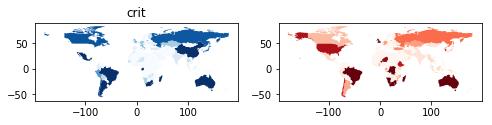

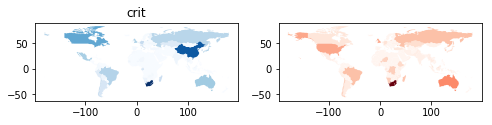

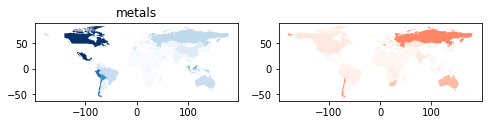

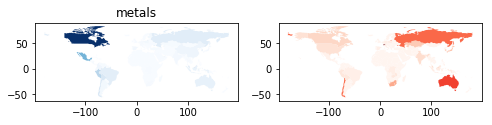

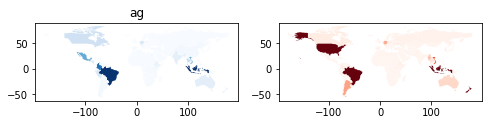

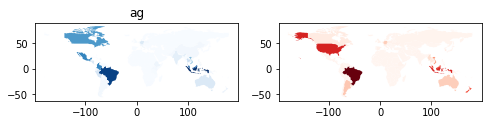

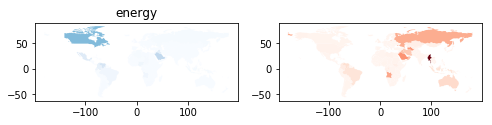

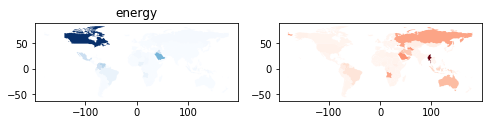

In [414]:
maps('crit', dat=out, vmax=1)
maps('crit', dat=out2)
maps('metals', dat=out, vmax=1)
maps('metals', dat=out2)
maps('ag', dat=out, vmax=1)
maps('ag', dat=out2)
maps('energy', dat=out, vmax=1)
maps('energy', dat=out2)

In [419]:
out.to_csv('scored_values.csv')